In [105]:
# Required modules
import urllib.request
from PIL import Image
from bs4 import BeautifulSoup
import requests

In [106]:
# requires urllib.request module

def savePictureFromWeb( url, saveFileName="tempWebImage.jpg" ):
    '''Pass in the url to an image, optionally pass in the name of the file
in which to save the image.  method returns the saved image name.
Example usage: saveFile = savePictureFromWEb("http://www.site.com/cat.jpg")'''
    try:
        urllib.request.urlretrieve(url, saveFileName )
    except:
        print("Error trying to open %s" %(url))
    return saveFileName

In [107]:
def intensity(pixel):
    return (pixel[0] + pixel[1] + pixel[2])/3.0

In [108]:
def relativeIntensity(pixel1, pixel2):
    diff = intensity(pixel1) - intensity(pixel2)
    diff = diff if diff >= 0 else diff * -1
    return diff

In [109]:
def distance( pt1, pt2 ):
    '''Calculate the distance between two points. Each point is a tuple in form (x,y)'''
    # distance = sqrt( x^2 + y^2 )
    return ((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)**0.5

In [110]:
def averageIntensity( pixel1, pixel2 ):
    ''' returns the average of two pixel values.  returns tuple (r,g,b)'''
    avgRed = (pixel1[0]+pixel2[0])//2
    avgGreen = (pixel1[1]+pixel2[1])//2
    avgBlue = (pixel1[2]+pixel2[2])//2
    return (avgRed, avgGreen, avgBlue)

In [111]:
#from bs4 import BeautifulSoup
#import requests

def getNasaSunspotPictureList( url ):

#url = "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/"

    # Getting the webpage, creating a Response object.
    response = requests.get(url)

    # Extracting the source code of the page.
    data = response.text

    # Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
    soup = BeautifulSoup(data, 'lxml')

    # Extracting all the <a> tags into a list.
    tags = soup.find_all('a')

    # Extracting URLs from the attribute href in the <a> tags.
    count = 0
    urlList = [] # empty lists to hold urls
    for tag in tags:
        if "_1024_" in tag.get('href') and "problem" not in tag.get('href'):
            #print(tag.get('href'))
            urlList.append("https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/" + tag.get('href'))
            count += 1

    return urlList


In [113]:
#Playground -- attempt to filter out white text in nasa image
#requires Image from PIL module

url = "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180512.jpg"

imageName = savePictureFromWeb(url)

im = Image.open(imageName)
pix = im.load()

for j in range( 1, im.size[1]):
    for i in range( 1, im.size[0]):
        if intensity(pix[i,j]) > 200 :
            pix[i,j] = averageIntensity( pix[i-1,j], pix[i,j-1])
im.save('filtered.png')  # Save the modified pixels as .png
print("done.")

done.


In [170]:
# requires from PIL import Image
def lookForSunspots( imageName, save=False ):
    im = Image.open( imageName )
    pix = im.load()
    
    count = 0
    # start looking for sunspot activity...
    for j in range(im.size[1]-1):
        for i in range(im.size[0]-1):
            # find change in sun intensity
            # if only in radius of sun:
            dist = distance((i,j), (im.size[0]/2,im.size[1]/2))
            if dist < im.size[0]*.80/2:
                # new algorithm:
                if( intensity(pix[i,j]) < (110 - dist*100/im.size[0]) ):
                    pix[i,j] = (255,0,0)
                    count += 1
                '''
                if( relativeIntensity(pix[i,j],pix[i+1,j]) > 40 or relativeIntensity(pix[i,j],pix[i,j+1]) > 40):
                    # try to filter out catching the label
                    if( intensity(pix[i,j]) < 200 and intensity(pix[i+1,j]) < 200 and intensity(pix[i,j+1]) < 200 ):
                        pix[i,j] = (255,0,0)
                        count += 1
                '''
                        
    '''
    if( count == 0 ):
        print("No Sunspots Found.")
    else:
        print("Sunspot activity found (%d)" %(count))
    '''
    if( save ):
        im.save('altered.png')
    return count

In [174]:
# Test algorithms
url = "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110708.jpg"
imageName = savePictureFromWeb(url)
print(lookForSunspots(imageName, True))

20


In [179]:
# 'Main' program...

#nasaUrlLibrary = []
# no sunspots
#nasaUrlLibrary.append( "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180503.jpg")

# small sunspots
#nasaUrlLibrary.append( "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180512.jpg")

# big sunspots
#nasaUrlLibrary.append( "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180422.jpg")

nasaUrlLibrary = getNasaSunspotPictureList( "https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/" )
count = len(nasaUrlLibrary)
print("Found %d images" %(count))

file = open('sunspot_processing_results.txt', 'w')
file.write("Filename,Date,SunspotActivity\n")
for image in nasaUrlLibrary:
    print("(%d) Processing %s" %(count, image))
    date = image.split("_")
    date = date[-1].split(".")
    date = date[0]
    print("Date: %s" %(date))
    imageName = savePictureFromWeb(image)
    found = lookForSunspots( imageName )
    file.write("%s,%s,%d\n" %(image, date, found))
    if( found == 0 ):
        print("  No sunspots found.")  
    else:
        print("  Sunspot activity found (%d)" %(found)) 
    count -= 1
file.close()
print("done.")

Found 4284 images
(4284) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_19571231.jpg
Date: 19571231
  Sunspot activity found (517816)
(4283) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_19991130.jpg
Date: 19991130
  Sunspot activity found (279)
(4282) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20051222.jpg
Date: 20051222
  Sunspot activity found (13)
(4281) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060120.jpg
Date: 20060120
  Sunspot activity found (26)
(4280) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060121.jpg
Date: 20060121
  Sunspot activity found (27)
(4279) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060122.jpg
Date: 20060122
  Sunspot activity found (22)
(4278) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspot

  Sunspot activity found (4)
(4226) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060321.jpg
Date: 20060321
  Sunspot activity found (1)
(4225) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060322.jpg
Date: 20060322
  No sunspots found.
(4224) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060323.jpg
Date: 20060323
  No sunspots found.
(4223) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060324.jpg
Date: 20060324
  No sunspots found.
(4222) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060325.jpg
Date: 20060325
  No sunspots found.
(4221) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060326.jpg
Date: 20060326
  No sunspots found.
(4220) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060327.jpg
Date:

  No sunspots found.
(4170) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060516.jpg
Date: 20060516
  No sunspots found.
(4169) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060517.jpg
Date: 20060517
  No sunspots found.
(4168) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060518.jpg
Date: 20060518
  No sunspots found.
(4167) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060519.jpg
Date: 20060519
  No sunspots found.
(4166) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060520.jpg
Date: 20060520
  No sunspots found.
(4165) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060521.jpg
Date: 20060521
  No sunspots found.
(4164) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060522.jpg
Date: 20060522
  Suns

  No sunspots found.
(4113) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060712.jpg
Date: 20060712
  No sunspots found.
(4112) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060713.jpg
Date: 20060713
  No sunspots found.
(4111) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060714.jpg
Date: 20060714
  No sunspots found.
(4110) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060715.jpg
Date: 20060715
  No sunspots found.
(4109) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060716.jpg
Date: 20060716
  No sunspots found.
(4108) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060717.jpg
Date: 20060717
  No sunspots found.
(4107) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060718.jpg
Date: 20060718
  No s

  No sunspots found.
(4056) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060907.jpg
Date: 20060907
  Sunspot activity found (30)
(4055) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060908.jpg
Date: 20060908
  Sunspot activity found (31)
(4054) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060909.jpg
Date: 20060909
  Sunspot activity found (43)
(4053) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060910.jpg
Date: 20060910
  Sunspot activity found (35)
(4052) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060911.jpg
Date: 20060911
  Sunspot activity found (51)
(4051) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20060912.jpg
Date: 20060912
  Sunspot activity found (51)
(4050) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_

  Sunspot activity found (23)
(3999) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061103.jpg
Date: 20061103
  Sunspot activity found (25)
(3998) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061104.jpg
Date: 20061104
  Sunspot activity found (17)
(3997) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061105.jpg
Date: 20061105
  Sunspot activity found (16)
(3996) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061106.jpg
Date: 20061106
  Sunspot activity found (17)
(3995) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061107.jpg
Date: 20061107
  Sunspot activity found (6)
(3994) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061108.jpg
Date: 20061108
  No sunspots found.
(3993) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_e

  No sunspots found.
(3943) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061230.jpg
Date: 20061230
  No sunspots found.
(3942) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20061231.jpg
Date: 20061231
  No sunspots found.
(3941) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070101.jpg
Date: 20070101
  Sunspot activity found (20)
(3940) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070102.jpg
Date: 20070102
  Sunspot activity found (28)
(3939) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070103.jpg
Date: 20070103
  Sunspot activity found (89)
(3938) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070104.jpg
Date: 20070104
  Sunspot activity found (113)
(3937) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_10

  Sunspot activity found (20)
(3886) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070301.jpg
Date: 20070301
  Sunspot activity found (26)
(3885) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070302.jpg
Date: 20070302
  Sunspot activity found (14)
(3884) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070303.jpg
Date: 20070303
  Sunspot activity found (14)
(3883) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070305.jpg
Date: 20070305
  No sunspots found.
(3882) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070306.jpg
Date: 20070306
  No sunspots found.
(3881) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070307.jpg
Date: 20070307
  No sunspots found.
(3880) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_102

  Sunspot activity found (58)
(3828) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070429.jpg
Date: 20070429
  Sunspot activity found (70)
(3827) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070430.jpg
Date: 20070430
  Sunspot activity found (87)
(3826) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070501.jpg
Date: 20070501
  Sunspot activity found (93)
(3825) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070502.jpg
Date: 20070502
  Sunspot activity found (75)
(3824) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070503.jpg
Date: 20070503
  Sunspot activity found (46)
(3823) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070504.jpg
Date: 20070504
  Sunspot activity found (29)
(3822) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  No sunspots found.
(3772) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070624.jpg
Date: 20070624
  No sunspots found.
(3771) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070625.jpg
Date: 20070625
  No sunspots found.
(3770) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070626.jpg
Date: 20070626
  Sunspot activity found (18)
(3769) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070627.jpg
Date: 20070627
  Sunspot activity found (21)
(3768) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070628.jpg
Date: 20070628
  Sunspot activity found (18)
(3767) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070629.jpg
Date: 20070629
  Sunspot activity found (33)
(3766) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_102

  No sunspots found.
(3715) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070821.jpg
Date: 20070821
  No sunspots found.
(3714) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070822.jpg
Date: 20070822
  No sunspots found.
(3713) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070823.jpg
Date: 20070823
  Sunspot activity found (6)
(3712) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070824.jpg
Date: 20070824
  Sunspot activity found (6)
(3711) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070825.jpg
Date: 20070825
  Sunspot activity found (10)
(3710) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20070826.jpg
Date: 20070826
  Sunspot activity found (10)
(3709) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_

  No sunspots found.
(3657) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071020.jpg
Date: 20071020
  No sunspots found.
(3656) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071021.jpg
Date: 20071021
  No sunspots found.
(3655) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071022.jpg
Date: 20071022
  No sunspots found.
(3654) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071023.jpg
Date: 20071023
  No sunspots found.
(3653) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071024.jpg
Date: 20071024
  No sunspots found.
(3652) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071025.jpg
Date: 20071025
  No sunspots found.
(3651) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071026.jpg
Date: 20071026
  No s

  No sunspots found.
(3599) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071217.jpg
Date: 20071217
  No sunspots found.
(3598) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071218.jpg
Date: 20071218
  No sunspots found.
(3597) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071219.jpg
Date: 20071219
  No sunspots found.
(3596) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071220.jpg
Date: 20071220
  No sunspots found.
(3595) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071221.jpg
Date: 20071221
  No sunspots found.
(3594) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071222.jpg
Date: 20071222
  No sunspots found.
(3593) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20071223.jpg
Date: 20071223
  No s

  No sunspots found.
(3541) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080214.jpg
Date: 20080214
  No sunspots found.
(3540) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080215.jpg
Date: 20080215
  No sunspots found.
(3539) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080216.jpg
Date: 20080216
  No sunspots found.
(3538) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080217.jpg
Date: 20080217
  No sunspots found.
(3537) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080218.jpg
Date: 20080218
  No sunspots found.
(3536) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080219.jpg
Date: 20080219
  No sunspots found.
(3535) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080220.jpg
Date: 20080220
  No s

  No sunspots found.
(3483) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080412.jpg
Date: 20080412
  No sunspots found.
(3482) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080413.jpg
Date: 20080413
  No sunspots found.
(3481) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080414.jpg
Date: 20080414
  No sunspots found.
(3480) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080415.jpg
Date: 20080415
  No sunspots found.
(3479) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080416.jpg
Date: 20080416
  No sunspots found.
(3478) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080417.jpg
Date: 20080417
  No sunspots found.
(3477) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080418.jpg
Date: 20080418
  No s

  No sunspots found.
(3425) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080609.jpg
Date: 20080609
  No sunspots found.
(3424) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080610.jpg
Date: 20080610
  No sunspots found.
(3423) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080611.jpg
Date: 20080611
  No sunspots found.
(3422) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080612.jpg
Date: 20080612
  No sunspots found.
(3421) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080613.jpg
Date: 20080613
  No sunspots found.
(3420) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080614.jpg
Date: 20080614
  No sunspots found.
(3419) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080615.jpg
Date: 20080615
  No s

  No sunspots found.
(3367) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080811.jpg
Date: 20080811
  No sunspots found.
(3366) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080812.jpg
Date: 20080812
  No sunspots found.
(3365) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080813.jpg
Date: 20080813
  No sunspots found.
(3364) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080814.jpg
Date: 20080814
  No sunspots found.
(3363) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080815.jpg
Date: 20080815
  No sunspots found.
(3362) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080816.jpg
Date: 20080816
  No sunspots found.
(3361) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20080817.jpg
Date: 20080817
  No s

  No sunspots found.
(3309) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081008.jpg
Date: 20081008
  No sunspots found.
(3308) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081010.jpg
Date: 20081010
  No sunspots found.
(3307) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081011.jpg
Date: 20081011
  No sunspots found.
(3306) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081012.jpg
Date: 20081012
  No sunspots found.
(3305) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081013.jpg
Date: 20081013
  Sunspot activity found (2)
(3304) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081014.jpg
Date: 20081014
  No sunspots found.
(3303) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081015.jpg
Date: 2008101

  No sunspots found.
(3251) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081209.jpg
Date: 20081209
  No sunspots found.
(3250) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081210.jpg
Date: 20081210
  No sunspots found.
(3249) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081212.jpg
Date: 20081212
  No sunspots found.
(3248) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081213.jpg
Date: 20081213
  No sunspots found.
(3247) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081214.jpg
Date: 20081214
  No sunspots found.
(3246) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081215.jpg
Date: 20081215
  No sunspots found.
(3245) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20081216.jpg
Date: 20081216
  No s

  No sunspots found.
(3193) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090206.jpg
Date: 20090206
  No sunspots found.
(3192) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090207.jpg
Date: 20090207
  No sunspots found.
(3191) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090208.jpg
Date: 20090208
  No sunspots found.
(3190) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090209.jpg
Date: 20090209
  No sunspots found.
(3189) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090210.jpg
Date: 20090210
  No sunspots found.
(3188) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090211.jpg
Date: 20090211
  No sunspots found.
(3187) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090212.jpg
Date: 20090212
  No s

  No sunspots found.
(3135) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090409.jpg
Date: 20090409
  No sunspots found.
(3134) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090410.jpg
Date: 20090410
  No sunspots found.
(3133) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090411.jpg
Date: 20090411
  No sunspots found.
(3132) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090412.jpg
Date: 20090412
  No sunspots found.
(3131) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090413.jpg
Date: 20090413
  No sunspots found.
(3130) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090414.jpg
Date: 20090414
  No sunspots found.
(3129) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090415.jpg
Date: 20090415
  No s

  No sunspots found.
(3077) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090606.jpg
Date: 20090606
  No sunspots found.
(3076) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090607.jpg
Date: 20090607
  No sunspots found.
(3075) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090608.jpg
Date: 20090608
  No sunspots found.
(3074) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090609.jpg
Date: 20090609
  No sunspots found.
(3073) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090610.jpg
Date: 20090610
  No sunspots found.
(3072) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090611.jpg
Date: 20090611
  No sunspots found.
(3071) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090612.jpg
Date: 20090612
  No s

  No sunspots found.
(3019) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090819.jpg
Date: 20090819
  No sunspots found.
(3018) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090820.jpg
Date: 20090820
  No sunspots found.
(3017) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090821.jpg
Date: 20090821
  No sunspots found.
(3016) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090822.jpg
Date: 20090822
  No sunspots found.
(3015) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090823.jpg
Date: 20090823
  No sunspots found.
(3014) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090824.jpg
Date: 20090824
  No sunspots found.
(3013) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20090825.jpg
Date: 20090825
  No s

  No sunspots found.
(2961) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091020.jpg
Date: 20091020
  No sunspots found.
(2960) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091021.jpg
Date: 20091021
  No sunspots found.
(2959) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091022.jpg
Date: 20091022
  No sunspots found.
(2958) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091023.jpg
Date: 20091023
  No sunspots found.
(2957) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091024.jpg
Date: 20091024
  No sunspots found.
(2956) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091025.jpg
Date: 20091025
  Sunspot activity found (2)
(2955) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091026.jpg
Date: 2009102

  Sunspot activity found (43)
(2903) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091218.jpg
Date: 20091218
  Sunspot activity found (32)
(2902) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091219.jpg
Date: 20091219
  Sunspot activity found (25)
(2901) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091222.jpg
Date: 20091222
  No sunspots found.
(2900) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091224.jpg
Date: 20091224
  No sunspots found.
(2899) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091226.jpg
Date: 20091226
  No sunspots found.
(2898) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20091229.jpg
Date: 20091229
  No sunspots found.
(2897) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_2009123

  Sunspot activity found (6)
(2847) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100306.jpg
Date: 20100306
  Sunspot activity found (6)
(2846) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100307.jpg
Date: 20100307
  Sunspot activity found (6)
(2845) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100308.jpg
Date: 20100308
  Sunspot activity found (6)
(2844) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100309.jpg
Date: 20100309
  Sunspot activity found (6)
(2843) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100310.jpg
Date: 20100310
  Sunspot activity found (6)
(2842) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100311.jpg
Date: 20100311
  Sunspot activity found (15)
(2841) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspo

  Sunspot activity found (5)
(2792) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100430.jpg
Date: 20100430
  Sunspot activity found (6)
(2791) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100501.jpg
Date: 20100501
  Sunspot activity found (8)
(2790) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100502.jpg
Date: 20100502
  Sunspot activity found (6)
(2789) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100503.jpg
Date: 20100503
  Sunspot activity found (7)
(2788) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100504.jpg
Date: 20100504
  Sunspot activity found (8)
(2787) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100505.jpg
Date: 20100505
  Sunspot activity found (7)
(2786) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspot

  Sunspot activity found (7)
(2737) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100624.jpg
Date: 20100624
  Sunspot activity found (7)
(2736) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100625.jpg
Date: 20100625
  Sunspot activity found (8)
(2735) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100626.jpg
Date: 20100626
  Sunspot activity found (7)
(2734) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100627.jpg
Date: 20100627
  Sunspot activity found (7)
(2733) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100628.jpg
Date: 20100628
  Sunspot activity found (26)
(2732) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100629.jpg
Date: 20100629
  Sunspot activity found (32)
(2731) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunsp

  Sunspot activity found (6)
(2682) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100818.jpg
Date: 20100818
  Sunspot activity found (6)
(2681) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100819.jpg
Date: 20100819
  Sunspot activity found (6)
(2680) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100820.jpg
Date: 20100820
  Sunspot activity found (7)
(2679) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100821.jpg
Date: 20100821
  Sunspot activity found (7)
(2678) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100822.jpg
Date: 20100822
  Sunspot activity found (6)
(2677) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20100823.jpg
Date: 20100823
  Sunspot activity found (7)
(2676) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspot

  Sunspot activity found (7)
(2627) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101012.jpg
Date: 20101012
  Sunspot activity found (8)
(2626) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101013.jpg
Date: 20101013
  Sunspot activity found (7)
(2625) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101014.jpg
Date: 20101014
  Sunspot activity found (6)
(2624) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101015.jpg
Date: 20101015
  Sunspot activity found (27)
(2623) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101016.jpg
Date: 20101016
  Sunspot activity found (41)
(2622) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101017.jpg
Date: 20101017
  Sunspot activity found (53)
(2621) Processing https://sohowww.nascom.nasa.gov/data/synoptic/suns

  Sunspot activity found (6)
(2572) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101219.jpg
Date: 20101219
  Sunspot activity found (6)
(2571) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101220.jpg
Date: 20101220
  Sunspot activity found (5)
(2570) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101221.jpg
Date: 20101221
  Sunspot activity found (6)
(2569) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101222.jpg
Date: 20101222
  Sunspot activity found (7)
(2568) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101223.jpg
Date: 20101223
  Sunspot activity found (8)
(2567) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20101224.jpg
Date: 20101224
  Sunspot activity found (8)
(2566) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspot

  Sunspot activity found (75)
(2517) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110407.jpg
Date: 20110407
  Sunspot activity found (92)
(2516) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110408.jpg
Date: 20110408
  Sunspot activity found (32)
(2515) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110409.jpg
Date: 20110409
  Sunspot activity found (28)
(2514) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110410.jpg
Date: 20110410
  Sunspot activity found (41)
(2513) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110411.jpg
Date: 20110411
  Sunspot activity found (55)
(2512) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110412.jpg
Date: 20110412
  Sunspot activity found (93)
(2511) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  Sunspot activity found (135)
(2462) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110602.jpg
Date: 20110602
  Sunspot activity found (136)
(2461) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110603.jpg
Date: 20110603
  Sunspot activity found (147)
(2460) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110604.jpg
Date: 20110604
  Sunspot activity found (95)
(2459) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110605.jpg
Date: 20110605
  Sunspot activity found (95)
(2458) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110606.jpg
Date: 20110606
  Sunspot activity found (51)
(2457) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110607.jpg
Date: 20110607
  Sunspot activity found (42)
(2456) Processing https://sohowww.nascom.nasa.gov/data/synopt

  Sunspot activity found (52)
(2407) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110727.jpg
Date: 20110727
  Sunspot activity found (212)
(2406) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110728.jpg
Date: 20110728
  Sunspot activity found (279)
(2405) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110729.jpg
Date: 20110729
  Sunspot activity found (520)
(2404) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110730.jpg
Date: 20110730
  Sunspot activity found (428)
(2403) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110731.jpg
Date: 20110731
  Sunspot activity found (515)
(2402) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110801.jpg
Date: 20110801
  Sunspot activity found (597)
(2401) Processing https://sohowww.nascom.nasa.gov/data/syn

  Sunspot activity found (225)
(2352) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110920.jpg
Date: 20110920
  Sunspot activity found (165)
(2351) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110921.jpg
Date: 20110921
  Sunspot activity found (159)
(2350) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110922.jpg
Date: 20110922
  Sunspot activity found (210)
(2349) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110923.jpg
Date: 20110923
  Sunspot activity found (674)
(2348) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110924.jpg
Date: 20110924
  Sunspot activity found (551)
(2347) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20110925.jpg
Date: 20110925
  Sunspot activity found (495)
(2346) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (418)
(2298) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20111113.jpg
Date: 20111113
  Sunspot activity found (197)
(2297) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20111114.jpg
Date: 20111114
  Sunspot activity found (210)
(2296) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20111115.jpg
Date: 20111115
  Sunspot activity found (208)
(2295) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20111116.jpg
Date: 20111116
  Sunspot activity found (120)
(2294) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20111117.jpg
Date: 20111117
  Sunspot activity found (110)
(2293) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20111118.jpg
Date: 20111118
  Sunspot activity found (149)
(2292) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (224)
(2244) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120106.jpg
Date: 20120106
  Sunspot activity found (247)
(2243) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120107.jpg
Date: 20120107
  Sunspot activity found (367)
(2242) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120108.jpg
Date: 20120108
  Sunspot activity found (391)
(2241) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120109.jpg
Date: 20120109
  Sunspot activity found (449)
(2240) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120110.jpg
Date: 20120110
  Sunspot activity found (173)
(2239) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120111.jpg
Date: 20120111
  Sunspot activity found (69)
(2238) Processing https://sohowww.nascom.nasa.gov/data/syn

  Sunspot activity found (40)
(2189) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120301.jpg
Date: 20120301
  Sunspot activity found (48)
(2188) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120302.jpg
Date: 20120302
  Sunspot activity found (40)
(2187) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120303.jpg
Date: 20120303
  Sunspot activity found (55)
(2186) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120304.jpg
Date: 20120304
  Sunspot activity found (526)
(2185) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120305.jpg
Date: 20120305
  Sunspot activity found (675)
(2184) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120306.jpg
Date: 20120306
  Sunspot activity found (684)
(2183) Processing https://sohowww.nascom.nasa.gov/data/synopt

  Sunspot activity found (282)
(2134) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120425.jpg
Date: 20120425
  Sunspot activity found (224)
(2133) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120426.jpg
Date: 20120426
  Sunspot activity found (118)
(2132) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120427.jpg
Date: 20120427
  Sunspot activity found (107)
(2131) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120428.jpg
Date: 20120428
  Sunspot activity found (160)
(2130) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120429.jpg
Date: 20120429
  Sunspot activity found (271)
(2129) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120430.jpg
Date: 20120430
  Sunspot activity found (173)
(2128) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (370)
(2080) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120618.jpg
Date: 20120618
  Sunspot activity found (356)
(2079) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120619.jpg
Date: 20120619
  Sunspot activity found (382)
(2078) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120620.jpg
Date: 20120620
  Sunspot activity found (3)
(2077) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120621.jpg
Date: 20120621
  Sunspot activity found (6)
(2076) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120622.jpg
Date: 20120622
  Sunspot activity found (10)
(2075) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120623.jpg
Date: 20120623
  Sunspot activity found (5)
(2074) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  Sunspot activity found (147)
(2025) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120813.jpg
Date: 20120813
  Sunspot activity found (145)
(2024) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120814.jpg
Date: 20120814
  Sunspot activity found (146)
(2023) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120815.jpg
Date: 20120815
  Sunspot activity found (122)
(2022) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120816.jpg
Date: 20120816
  Sunspot activity found (125)
(2021) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120817.jpg
Date: 20120817
  Sunspot activity found (179)
(2020) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20120818.jpg
Date: 20120818
  Sunspot activity found (180)
(2019) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (99)
(1971) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121008.jpg
Date: 20121008
  Sunspot activity found (99)
(1970) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121009.jpg
Date: 20121009
  Sunspot activity found (107)
(1969) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121010.jpg
Date: 20121010
  Sunspot activity found (223)
(1968) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121011.jpg
Date: 20121011
  Sunspot activity found (108)
(1967) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121012.jpg
Date: 20121012
  Sunspot activity found (113)
(1966) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121013.jpg
Date: 20121013
  Sunspot activity found (198)
(1965) Processing https://sohowww.nascom.nasa.gov/data/syno

  Sunspot activity found (162)
(1917) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121202.jpg
Date: 20121202
  Sunspot activity found (141)
(1916) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121203.jpg
Date: 20121203
  Sunspot activity found (109)
(1915) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121204.jpg
Date: 20121204
  Sunspot activity found (86)
(1914) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121205.jpg
Date: 20121205
  Sunspot activity found (66)
(1913) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121206.jpg
Date: 20121206
  Sunspot activity found (43)
(1912) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20121207.jpg
Date: 20121207
  Sunspot activity found (49)
(1911) Processing https://sohowww.nascom.nasa.gov/data/synopt

  Sunspot activity found (55)
(1862) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130126.jpg
Date: 20130126
  Sunspot activity found (58)
(1861) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130127.jpg
Date: 20130127
  Sunspot activity found (59)
(1860) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130128.jpg
Date: 20130128
  Sunspot activity found (57)
(1859) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130129.jpg
Date: 20130129
  Sunspot activity found (147)
(1858) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130130.jpg
Date: 20130130
  Sunspot activity found (115)
(1857) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130131.jpg
Date: 20130131
  Sunspot activity found (108)
(1856) Processing https://sohowww.nascom.nasa.gov/data/synopt

  Sunspot activity found (60)
(1807) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130322.jpg
Date: 20130322
  Sunspot activity found (37)
(1806) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130323.jpg
Date: 20130323
  Sunspot activity found (30)
(1805) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130324.jpg
Date: 20130324
  Sunspot activity found (70)
(1804) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130325.jpg
Date: 20130325
  Sunspot activity found (32)
(1803) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130326.jpg
Date: 20130326
  Sunspot activity found (30)
(1802) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130327.jpg
Date: 20130327
  Sunspot activity found (39)
(1801) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  Sunspot activity found (460)
(1753) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130515.jpg
Date: 20130515
  Sunspot activity found (469)
(1752) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130516.jpg
Date: 20130516
  Sunspot activity found (403)
(1751) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130517.jpg
Date: 20130517
  Sunspot activity found (346)
(1750) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130518.jpg
Date: 20130518
  Sunspot activity found (258)
(1749) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130519.jpg
Date: 20130519
  Sunspot activity found (218)
(1748) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130520.jpg
Date: 20130520
  Sunspot activity found (137)
(1747) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (284)
(1699) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130708.jpg
Date: 20130708
  Sunspot activity found (232)
(1698) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130709.jpg
Date: 20130709
  Sunspot activity found (197)
(1697) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130710.jpg
Date: 20130710
  Sunspot activity found (115)
(1696) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130711.jpg
Date: 20130711
  Sunspot activity found (65)
(1695) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130712.jpg
Date: 20130712
  Sunspot activity found (44)
(1694) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130713.jpg
Date: 20130713
  Sunspot activity found (45)
(1693) Processing https://sohowww.nascom.nasa.gov/data/synop

  Sunspot activity found (136)
(1645) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130831.jpg
Date: 20130831
  Sunspot activity found (127)
(1644) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130901.jpg
Date: 20130901
  Sunspot activity found (135)
(1643) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130902.jpg
Date: 20130902
  Sunspot activity found (145)
(1642) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130903.jpg
Date: 20130903
  Sunspot activity found (156)
(1641) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130904.jpg
Date: 20130904
  Sunspot activity found (96)
(1640) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20130905.jpg
Date: 20130905
  Sunspot activity found (118)
(1639) Processing https://sohowww.nascom.nasa.gov/data/syn

  Sunspot activity found (601)
(1590) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131025.jpg
Date: 20131025
  Sunspot activity found (694)
(1589) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131026.jpg
Date: 20131026
  Sunspot activity found (608)
(1588) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131027.jpg
Date: 20131027
  Sunspot activity found (824)
(1587) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131028.jpg
Date: 20131028
  Sunspot activity found (610)
(1586) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131029.jpg
Date: 20131029
  Sunspot activity found (496)
(1585) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131030.jpg
Date: 20131030
  Sunspot activity found (344)
(1584) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (221)
(1536) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131230.jpg
Date: 20131230
  Sunspot activity found (194)
(1535) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20131231.jpg
Date: 20131231
  Sunspot activity found (186)
(1534) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140101.jpg
Date: 20140101
  Sunspot activity found (200)
(1533) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140102.jpg
Date: 20140102
  Sunspot activity found (675)
(1532) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140103.jpg
Date: 20140103
  Sunspot activity found (768)
(1531) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140104.jpg
Date: 20140104
  Sunspot activity found (836)
(1530) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (292)
(1482) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140222.jpg
Date: 20140222
  Sunspot activity found (371)
(1481) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140223.jpg
Date: 20140223
  Sunspot activity found (391)
(1480) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140224.jpg
Date: 20140224
  Sunspot activity found (307)
(1479) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140225.jpg
Date: 20140225
  Sunspot activity found (426)
(1478) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140226.jpg
Date: 20140226
  Sunspot activity found (441)
(1477) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140227.jpg
Date: 20140227
  Sunspot activity found (511)
(1476) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (599)
(1428) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140417.jpg
Date: 20140417
  Sunspot activity found (740)
(1427) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140418.jpg
Date: 20140418
  Sunspot activity found (535)
(1426) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140419.jpg
Date: 20140419
  Sunspot activity found (444)
(1425) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140420.jpg
Date: 20140420
  Sunspot activity found (400)
(1424) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140421.jpg
Date: 20140421
  Sunspot activity found (222)
(1423) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140422.jpg
Date: 20140422
  Sunspot activity found (180)
(1422) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (592)
(1374) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140610.jpg
Date: 20140610
  Sunspot activity found (629)
(1373) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140611.jpg
Date: 20140611
  Sunspot activity found (860)
(1372) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140612.jpg
Date: 20140612
  Sunspot activity found (895)
(1371) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140613.jpg
Date: 20140613
  Sunspot activity found (304)
(1370) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140614.jpg
Date: 20140614
  Sunspot activity found (182)
(1369) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140615.jpg
Date: 20140615
  Sunspot activity found (215)
(1368) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (265)
(1319) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140804.jpg
Date: 20140804
  Sunspot activity found (192)
(1318) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140805.jpg
Date: 20140805
  Sunspot activity found (193)
(1317) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140806.jpg
Date: 20140806
  Sunspot activity found (222)
(1316) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140807.jpg
Date: 20140807
  Sunspot activity found (212)
(1315) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140808.jpg
Date: 20140808
  Sunspot activity found (176)
(1314) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140809.jpg
Date: 20140809
  Sunspot activity found (152)
(1313) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (686)
(1265) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140929.jpg
Date: 20140929
  Sunspot activity found (653)
(1264) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20140930.jpg
Date: 20140930
  Sunspot activity found (368)
(1263) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141001.jpg
Date: 20141001
  Sunspot activity found (170)
(1262) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141002.jpg
Date: 20141002
  Sunspot activity found (129)
(1261) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141003.jpg
Date: 20141003
  Sunspot activity found (154)
(1260) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141004.jpg
Date: 20141004
  Sunspot activity found (141)
(1259) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (658)
(1211) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141123.jpg
Date: 20141123
  Sunspot activity found (611)
(1210) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141124.jpg
Date: 20141124
  Sunspot activity found (623)
(1209) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141125.jpg
Date: 20141125
  Sunspot activity found (369)
(1208) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141126.jpg
Date: 20141126
  Sunspot activity found (341)
(1207) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141127.jpg
Date: 20141127
  Sunspot activity found (626)
(1206) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20141128.jpg
Date: 20141128
  Sunspot activity found (662)
(1205) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (107)
(1157) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150116.jpg
Date: 20150116
  Sunspot activity found (84)
(1156) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150119.jpg
Date: 20150119
  Sunspot activity found (156)
(1155) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150120.jpg
Date: 20150120
  Sunspot activity found (87)
(1154) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150121.jpg
Date: 20150121
  Sunspot activity found (47)
(1153) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150122.jpg
Date: 20150122
  Sunspot activity found (43)
(1152) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150123.jpg
Date: 20150123
  Sunspot activity found (184)
(1151) Processing https://sohowww.nascom.nasa.gov/data/synopt

  Sunspot activity found (229)
(1102) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150315.jpg
Date: 20150315
  Sunspot activity found (167)
(1101) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150316.jpg
Date: 20150316
  Sunspot activity found (152)
(1100) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150317.jpg
Date: 20150317
  Sunspot activity found (170)
(1099) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150318.jpg
Date: 20150318
  Sunspot activity found (71)
(1098) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150319.jpg
Date: 20150319
  Sunspot activity found (50)
(1097) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150320.jpg
Date: 20150320
  Sunspot activity found (39)
(1096) Processing https://sohowww.nascom.nasa.gov/data/synop

  Sunspot activity found (428)
(1047) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150509.jpg
Date: 20150509
  Sunspot activity found (376)
(1046) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150510.jpg
Date: 20150510
  Sunspot activity found (404)
(1045) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150511.jpg
Date: 20150511
  Sunspot activity found (414)
(1044) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150512.jpg
Date: 20150512
  Sunspot activity found (357)
(1043) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150513.jpg
Date: 20150513
  Sunspot activity found (294)
(1042) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150514.jpg
Date: 20150514
  Sunspot activity found (290)
(1041) Processing https://sohowww.nascom.nasa.gov/data/sy

  Sunspot activity found (112)
(992) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150703.jpg
Date: 20150703
  Sunspot activity found (517547)
(991) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150704.jpg
Date: 20150704
  Sunspot activity found (517428)
(990) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150705.jpg
Date: 20150705
  Sunspot activity found (517127)
(989) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150706.jpg
Date: 20150706
  Sunspot activity found (249)
(988) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150707.jpg
Date: 20150707
  Sunspot activity found (306)
(987) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150708.jpg
Date: 20150708
  Sunspot activity found (391)
(986) Processing https://sohowww.nascom.nasa.gov/data/

  Sunspot activity found (454)
(937) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150827.jpg
Date: 20150827
  Sunspot activity found (450)
(936) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150828.jpg
Date: 20150828
  Sunspot activity found (111)
(935) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150829.jpg
Date: 20150829
  Sunspot activity found (3)
(934) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150830.jpg
Date: 20150830
  Sunspot activity found (3)
(933) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150831.jpg
Date: 20150831
  Sunspot activity found (9)
(932) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20150901.jpg
Date: 20150901
  Sunspot activity found (24)
(931) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspot

  Sunspot activity found (92)
(882) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151026.jpg
Date: 20151026
  Sunspot activity found (76)
(881) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151027.jpg
Date: 20151027
  Sunspot activity found (91)
(880) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151028.jpg
Date: 20151028
  Sunspot activity found (40)
(879) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151029.jpg
Date: 20151029
  Sunspot activity found (121)
(878) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151030.jpg
Date: 20151030
  Sunspot activity found (291)
(877) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151031.jpg
Date: 20151031
  Sunspot activity found (307)
(876) Processing https://sohowww.nascom.nasa.gov/data/synoptic/suns

  Sunspot activity found (205)
(827) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151220.jpg
Date: 20151220
  Sunspot activity found (197)
(826) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151221.jpg
Date: 20151221
  Sunspot activity found (164)
(825) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151222.jpg
Date: 20151222
  Sunspot activity found (415)
(824) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151223.jpg
Date: 20151223
  Sunspot activity found (596)
(823) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151224.jpg
Date: 20151224
  Sunspot activity found (248)
(822) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20151225.jpg
Date: 20151225
  Sunspot activity found (222)
(821) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  Sunspot activity found (111)
(772) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160214.jpg
Date: 20160214
  Sunspot activity found (131)
(771) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160215.jpg
Date: 20160215
  Sunspot activity found (137)
(770) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160216.jpg
Date: 20160216
  Sunspot activity found (16)
(769) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160217.jpg
Date: 20160217
  Sunspot activity found (24)
(768) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160219.jpg
Date: 20160219
  Sunspot activity found (56)
(767) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160222.jpg
Date: 20160222
  Sunspot activity found (69)
(766) Processing https://sohowww.nascom.nasa.gov/data/synoptic/suns

  Sunspot activity found (465)
(717) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160414.jpg
Date: 20160414
  Sunspot activity found (432)
(716) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160415.jpg
Date: 20160415
  Sunspot activity found (421)
(715) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160416.jpg
Date: 20160416
  Sunspot activity found (365)
(714) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160417.jpg
Date: 20160417
  Sunspot activity found (372)
(713) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160418.jpg
Date: 20160418
  Sunspot activity found (172)
(712) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160419.jpg
Date: 20160419
  Sunspot activity found (6)
(711) Processing https://sohowww.nascom.nasa.gov/data/synoptic/su

  Sunspot activity found (210)
(662) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160612.jpg
Date: 20160612
  Sunspot activity found (209)
(661) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160613.jpg
Date: 20160613
  Sunspot activity found (182)
(660) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160614.jpg
Date: 20160614
  Sunspot activity found (138)
(659) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160615.jpg
Date: 20160615
  Sunspot activity found (163)
(658) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160616.jpg
Date: 20160616
  Sunspot activity found (165)
(657) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160617.jpg
Date: 20160617
  Sunspot activity found (155)
(656) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  Sunspot activity found (62)
(606) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160808.jpg
Date: 20160808
  Sunspot activity found (209)
(605) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160809.jpg
Date: 20160809
  Sunspot activity found (402)
(604) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160810.jpg
Date: 20160810
  Sunspot activity found (169)
(603) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160811.jpg
Date: 20160811
  Sunspot activity found (146)
(602) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160812.jpg
Date: 20160812
  Sunspot activity found (166)
(601) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20160813.jpg
Date: 20160813
  Sunspot activity found (168)
(600) Processing https://sohowww.nascom.nasa.gov/data/synoptic/s

  No sunspots found.
(551) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161002.jpg
Date: 20161002
  Sunspot activity found (16)
(550) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161003.jpg
Date: 20161003
  Sunspot activity found (20)
(549) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161004.jpg
Date: 20161004
  Sunspot activity found (265)
(548) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161005.jpg
Date: 20161005
  Sunspot activity found (214)
(547) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161006.jpg
Date: 20161006
  Sunspot activity found (198)
(546) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161007.jpg
Date: 20161007
  Sunspot activity found (197)
(545) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_ear

  Sunspot activity found (80)
(495) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161127.jpg
Date: 20161127
  Sunspot activity found (102)
(494) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161128.jpg
Date: 20161128
  Sunspot activity found (125)
(493) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161129.jpg
Date: 20161129
  Sunspot activity found (129)
(492) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161203.jpg
Date: 20161203
  Sunspot activity found (527097)
(491) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161204.jpg
Date: 20161204
  Sunspot activity found (527097)
(490) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20161205.jpg
Date: 20161205
  Sunspot activity found (527097)
(489) Processing https://sohowww.nascom.nasa.gov/data/s

  Sunspot activity found (127)
(439) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170125.jpg
Date: 20170125
  Sunspot activity found (123)
(438) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170126.jpg
Date: 20170126
  Sunspot activity found (103)
(437) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170127.jpg
Date: 20170127
  Sunspot activity found (103)
(436) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170128.jpg
Date: 20170128
  Sunspot activity found (38)
(435) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170129.jpg
Date: 20170129
  Sunspot activity found (30)
(434) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170130.jpg
Date: 20170130
  Sunspot activity found (28)
(433) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sun

  No sunspots found.
(383) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170322.jpg
Date: 20170322
  Sunspot activity found (10)
(382) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170323.jpg
Date: 20170323
  Sunspot activity found (9)
(381) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170324.jpg
Date: 20170324
  Sunspot activity found (8)
(380) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170325.jpg
Date: 20170325
  Sunspot activity found (14)
(379) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170326.jpg
Date: 20170326
  Sunspot activity found (67)
(378) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170327.jpg
Date: 20170327
  Sunspot activity found (157)
(377) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/su

  Sunspot activity found (11)
(327) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170517.jpg
Date: 20170517
  Sunspot activity found (11)
(326) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170518.jpg
Date: 20170518
  Sunspot activity found (21)
(325) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170519.jpg
Date: 20170519
  Sunspot activity found (25)
(324) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170520.jpg
Date: 20170520
  Sunspot activity found (19)
(323) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170521.jpg
Date: 20170521
  Sunspot activity found (29)
(322) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170522.jpg
Date: 20170522
  Sunspot activity found (32)
(321) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspot

  Sunspot activity found (360)
(272) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170711.jpg
Date: 20170711
  Sunspot activity found (415)
(271) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170712.jpg
Date: 20170712
  Sunspot activity found (266)
(270) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170713.jpg
Date: 20170713
  Sunspot activity found (351)
(269) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170714.jpg
Date: 20170714
  Sunspot activity found (329)
(268) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170715.jpg
Date: 20170715
  Sunspot activity found (337)
(267) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170716.jpg
Date: 20170716
  Sunspot activity found (163)
(266) Processing https://sohowww.nascom.nasa.gov/data/synoptic/

  Sunspot activity found (767)
(217) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170904.jpg
Date: 20170904
  Sunspot activity found (954)
(216) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170905.jpg
Date: 20170905
  Sunspot activity found (851)
(215) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170906.jpg
Date: 20170906
  Sunspot activity found (885)
(214) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170907.jpg
Date: 20170907
  Sunspot activity found (882)
(213) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170908.jpg
Date: 20170908
  Sunspot activity found (590)
(212) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20170909.jpg
Date: 20170909
  Sunspot activity found (56)
(211) Processing https://sohowww.nascom.nasa.gov/data/synoptic/s

  Sunspot activity found (6)
(161) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171030.jpg
Date: 20171030
  Sunspot activity found (2)
(160) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171031.jpg
Date: 20171031
  No sunspots found.
(159) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171101.jpg
Date: 20171101
  No sunspots found.
(158) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171102.jpg
Date: 20171102
  No sunspots found.
(157) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171103.jpg
Date: 20171103
  No sunspots found.
(156) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171104.jpg
Date: 20171104
  No sunspots found.
(155) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171105.jpg
Date: 201711

  Sunspot activity found (21)
(104) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171226.jpg
Date: 20171226
  Sunspot activity found (1)
(103) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171227.jpg
Date: 20171227
  No sunspots found.
(102) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171228.jpg
Date: 20171228
  No sunspots found.
(101) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171229.jpg
Date: 20171229
  No sunspots found.
(100) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171230.jpg
Date: 20171230
  No sunspots found.
(99) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20171231.jpg
Date: 20171231
  No sunspots found.
(98) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180101.jpg
Date: 2018010

  No sunspots found.
(47) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180326.jpg
Date: 20180326
  No sunspots found.
(46) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180327.jpg
Date: 20180327
  No sunspots found.
(45) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180404.jpg
Date: 20180404
  No sunspots found.
(44) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180405.jpg
Date: 20180405
  No sunspots found.
(43) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180406.jpg
Date: 20180406
  No sunspots found.
(42) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180407.jpg
Date: 20180407
  No sunspots found.
(41) Processing https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_20180408.jpg
Date: 20180408
  No sunspots found.

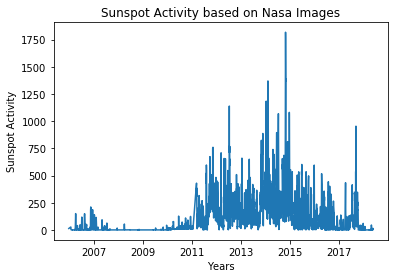

In [193]:
'''
Filename,Date,SunspotActivity
https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_19571231.jpg,19571231,517816
https://sohowww.nascom.nasa.gov/data/synoptic/sunspots_earth/sunspots_1024_19991130.jpg,19991130,279
'''
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y')

#sunspot_processing_results.txt
with open("sunspot_processing_results.txt", 'r') as file:
    spots = []
    dates = []
    for line in file:
        data = line.split(',')
        if( "S" not in data[2] ):
            spot = int(data[2])
            thisDate = date(int(data[1][0:4]), int(data[1][4:6]), int(data[1][6:]))
            if  spot < 10000:
                spots.append(spot)
                dates.append(thisDate)

fig, ax = plt.subplots()
ax.plot(dates,spots)
ax.xaxis.set_major_formatter(myFmt)
plt.title("Sunspot Activity based on Nasa Images")
plt.ylabel('Sunspot Activity')
plt.xlabel('Years')
plt.show()